In [544]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Formas y texto en OpenCV

In [545]:
black_img = np.zeros(shape=(512, 512, 3), dtype=np.int16)

In [546]:
black_img.shape

(512, 512, 3)

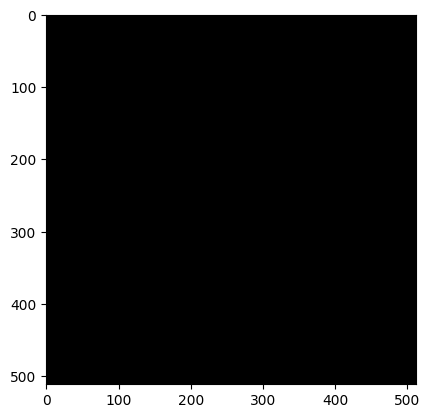

In [547]:
plt.imshow(black_img)

## Rectangulos

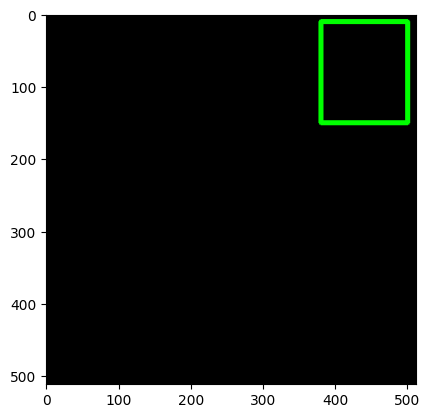

In [548]:
cv.rectangle(black_img, pt1=(380,10), pt2=(500, 150), color=(0,255,0), thickness=5)
plt.imshow(black_img)

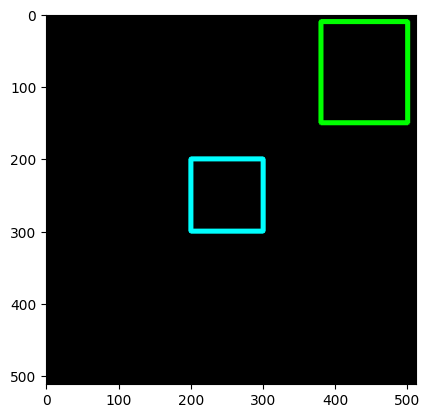

In [549]:
cv.rectangle(black_img, pt1=(200,200), pt2=(300, 300), color=(0,255,255), thickness=5)
plt.imshow(black_img)

## Circulos

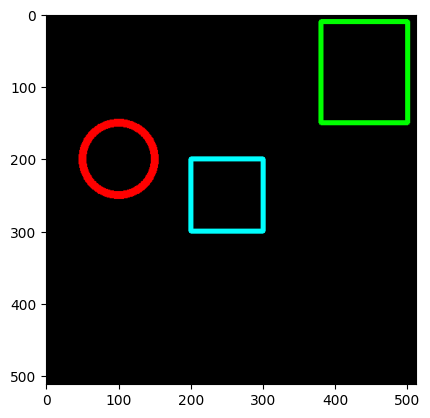

In [550]:
cv.circle(black_img, center=(100,200), radius=50, color=(255,0,0), thickness=10)
plt.imshow(black_img)

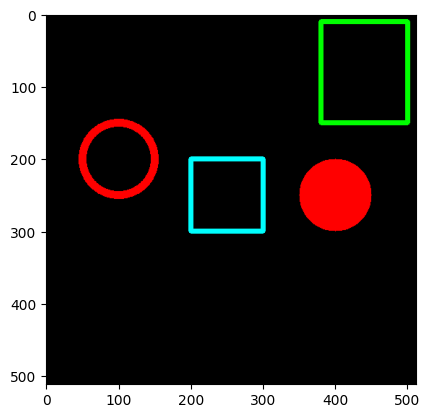

In [551]:
cv.circle(black_img, center=(400,250), radius=50, color=(255,0,0), thickness=-1)
plt.imshow(black_img)

## Lineas

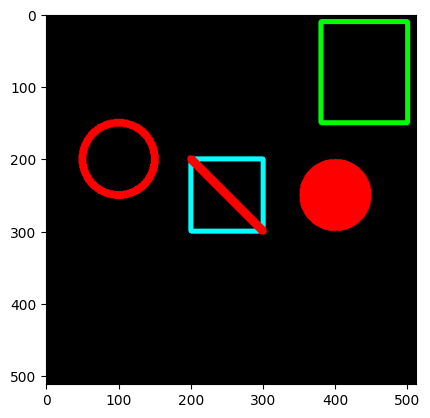

In [552]:
cv.line(black_img, pt1=(200,200), pt2=(300, 300), color=(255,0,0), thickness=10)
plt.imshow(black_img)

## Texto

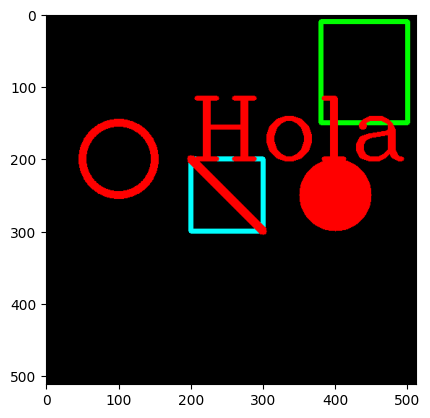

In [553]:
font = cv.FONT_HERSHEY_COMPLEX
cv.putText(black_img, text="Hola mundo", org=(200,200), fontFace=font, fontScale=4, color=(255,0,0), thickness=5, lineType=cv.LINE_AA)
plt.imshow(black_img)

In [554]:
vertices = np.array([[100, 300], [200,200], [400, 300], [200, 400]], dtype=np.int32)
vertices.shape

(4, 2)

In [555]:
pts = vertices.reshape((-1,1,2))

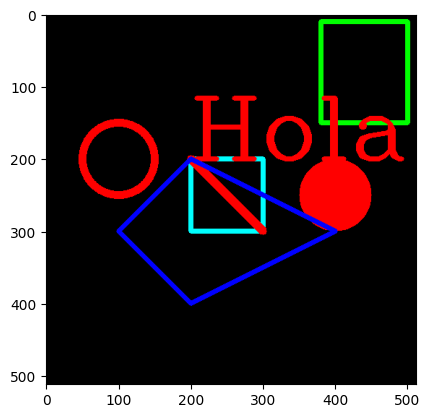

In [556]:
cv.polylines(black_img, [pts], isClosed=True, color=(0,0,255), thickness=5)
plt.imshow(black_img)

In [557]:
imagen_uno = cv.imread("imagen_uno.jpeg")
imagen_uno = cv.cvtColor(imagen_uno, cv.COLOR_BGR2RGB)

imagen_dos = cv.imread("imagen_dos.jpeg")
imagen_dos = cv.cvtColor(imagen_dos, cv.COLOR_BGR2RGB)

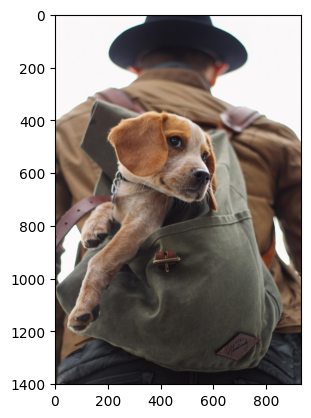

In [558]:
plt.imshow(imagen_uno)

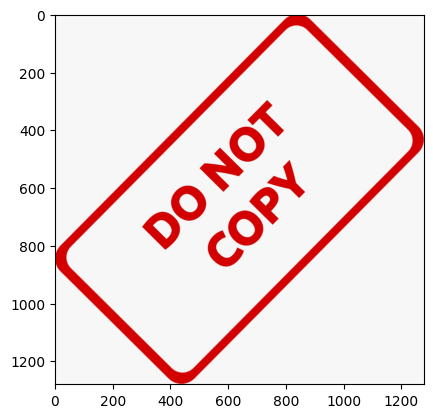

In [559]:
plt.imshow(imagen_dos)

In [560]:
imagen_uno.shape

(1401, 934, 3)

In [561]:
imagen_dos.shape

(1280, 1277, 3)

### Colocando imagenes del mismo tamaño

In [562]:
imagen_uno = cv.resize(imagen_uno, (1200, 1200))
imagen_dos = cv.resize(imagen_dos, (1200, 1200))

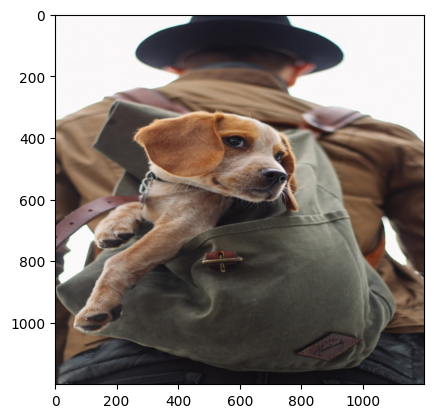

In [563]:
plt.imshow(imagen_uno)

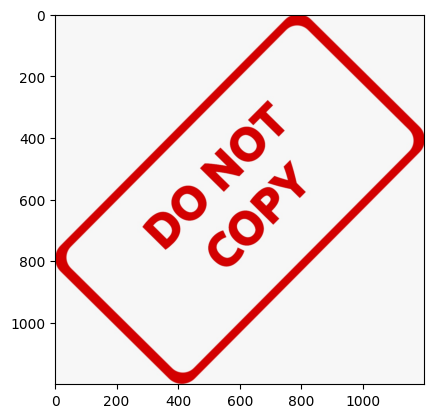

In [564]:
plt.imshow(imagen_dos)

In [565]:
mezcla = cv.addWeighted(src1=imagen_uno, src2=imagen_dos, beta=0.5, gamma=10, alpha=0.8)

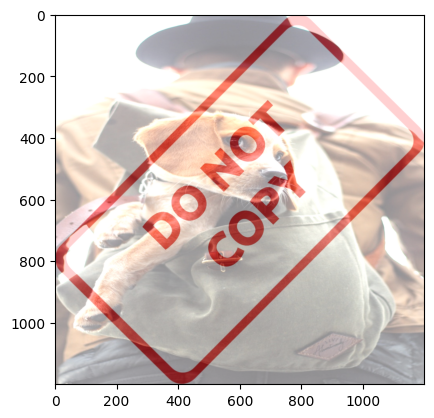

In [566]:
plt.imshow(mezcla)

In [567]:
imagen_uno = cv.imread("imagen_uno.jpeg")
imagen_uno = cv.cvtColor(imagen_uno, cv.COLOR_BGR2RGB)

imagen_dos = cv.imread("imagen_dos.jpeg")
imagen_dos = cv.cvtColor(imagen_dos, cv.COLOR_BGR2RGB)

In [568]:
imagen_dos = cv.resize(imagen_dos, (600, 600))

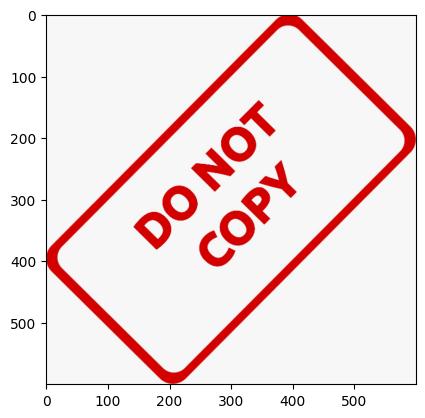

In [569]:
plt.imshow(imagen_dos)

In [570]:
large_imagen = imagen_uno
small_imagen = imagen_dos

In [571]:
x_offset = 0
y_offset = 0

In [572]:
x_end = x_offset + small_imagen.shape[0]
y_end = y_offset + small_imagen.shape[1] 

In [573]:
large_imagen[y_offset:y_end, x_offset:x_end] = small_imagen

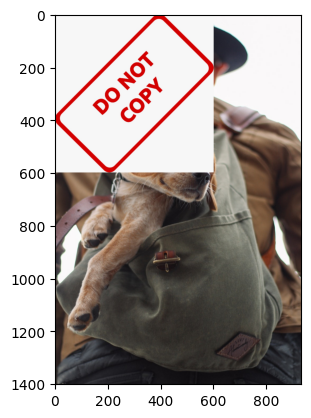

In [574]:
plt.imshow(large_imagen)

In [575]:
imagen_uno = cv.imread("imagen_uno.jpeg")
imagen_uno = cv.cvtColor(imagen_uno, cv.COLOR_BGR2RGB)

imagen_dos = cv.imread("imagen_dos.jpeg")
imagen_dos = cv.cvtColor(imagen_dos, cv.COLOR_BGR2RGB)

In [576]:
imagen_uno.shape

(1401, 934, 3)

In [577]:
imagen_dos = cv.resize(imagen_dos, (600, 600))

In [578]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [579]:
rows, cols, channels = imagen_dos.shape

In [580]:
roi = imagen_uno[y_offset:1401, x_offset:934]

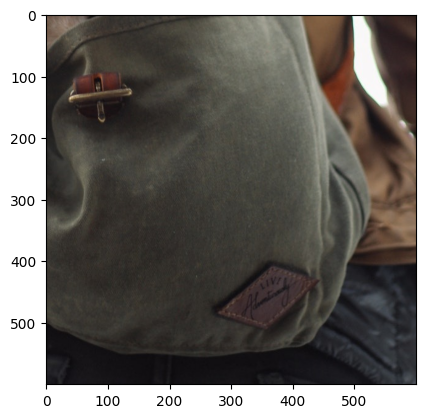

In [581]:
plt.imshow(roi)

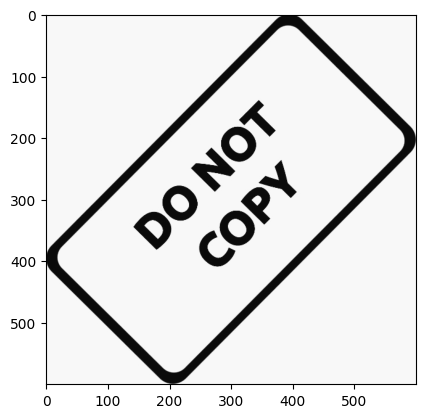

In [582]:
imagen_dos_gris = cv.cvtColor(imagen_dos, cv.COLOR_RGB2GRAY)
plt.imshow(imagen_dos_gris, cmap='gray')

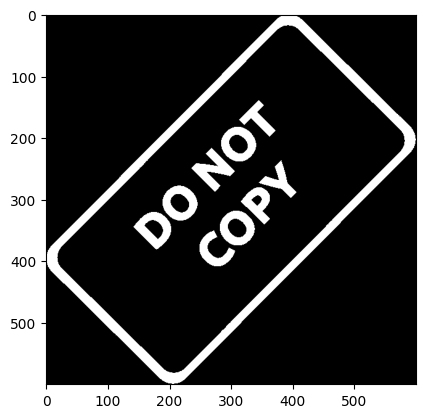

In [583]:
ret, mask = cv.threshold(imagen_dos_gris, 128, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
plt.imshow(mask_inv, cmap='gray')

In [584]:
white_background = np.full(imagen_dos.shape, 255, dtype=np.uint8)

In [585]:
fg = cv.bitwise_or(imagen_dos, imagen_dos, mask=mask_inv)

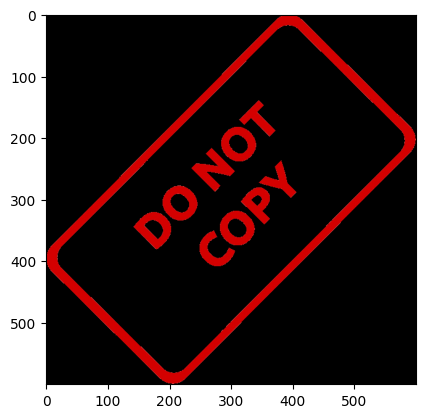

In [586]:
plt.imshow(fg)

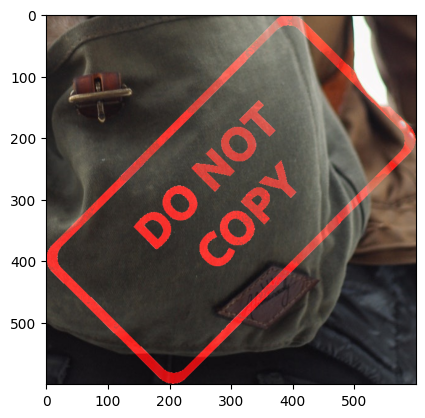

In [587]:
final_roi = cv.bitwise_or(roi,fg)
plt.imshow(final_roi)

### Tarea
Aplicar Blending entre la imagen uno y la dos sin cecesidad de redefinir el tamaño de la imagen uno

In [588]:
imagen_uno = cv.imread("imagen_uno.jpeg")
imagen_uno = cv.cvtColor(imagen_uno, cv.COLOR_BGR2RGB)

imagen_dos = cv.imread("imagen_dos.jpeg")
imagen_dos = cv.cvtColor(imagen_dos, cv.COLOR_BGR2RGB)

In [589]:
imagen_dos = cv.resize(imagen_dos, (600, 600))

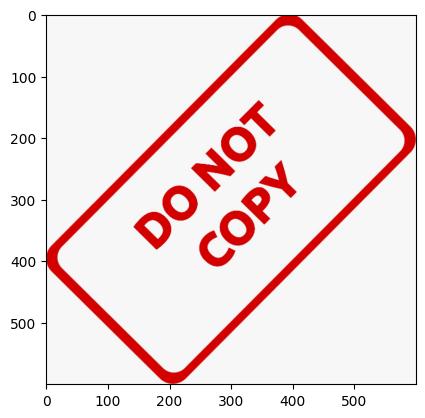

In [590]:
plt.imshow(imagen_dos)

In [591]:
imagen_dos_gris = cv.cvtColor(imagen_dos, cv.COLOR_RGB2GRAY)

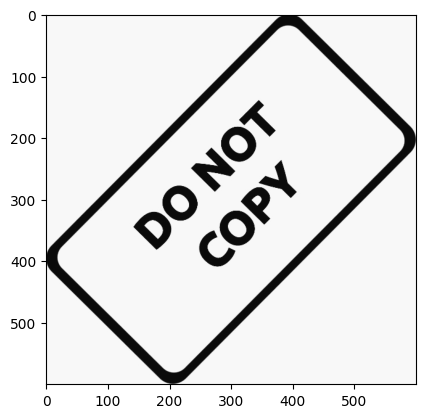

In [592]:
plt.imshow(imagen_dos_gris, cmap='gray')

In [593]:
threshold, imagen_dos_binaria = cv.threshold(imagen_dos_gris, 128, 255, cv.THRESH_BINARY)

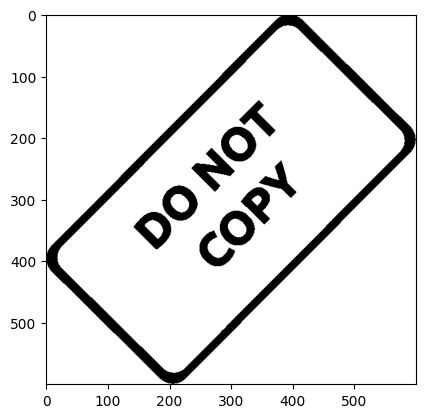

In [594]:
plt.imshow(imagen_dos_binaria, cmap='gray')

In [595]:
mask = cv.bitwise_not(imagen_dos_binaria)

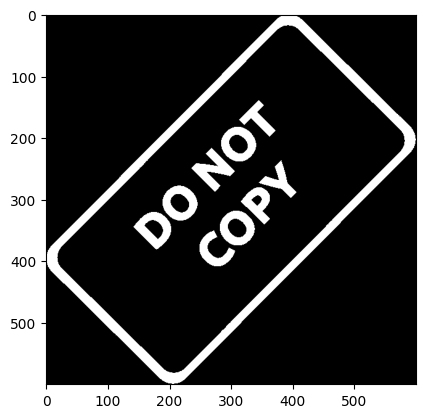

In [596]:
plt.imshow(mask, cmap='gray')

In [597]:
fg = cv.bitwise_or(imagen_dos, imagen_dos, mask=mask)

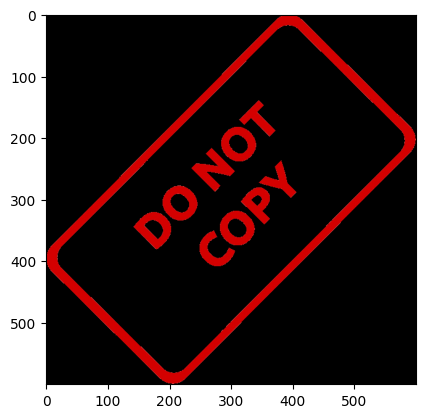

In [598]:
plt.imshow(fg)

In [599]:
fg_resize = cv.resize(fg, (imagen_uno.shape[1], imagen_uno.shape[0]))

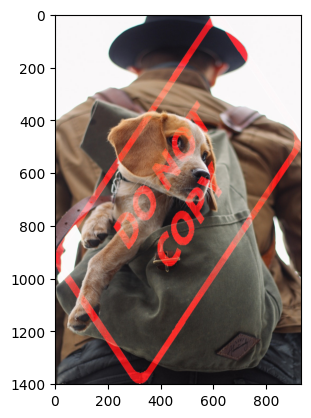

In [600]:
final_roi = cv.bitwise_or(imagen_uno,fg_resize)
plt.imshow(final_roi)

In [601]:
black_background = np.zeros(imagen_uno.shape, dtype=np.uint8)

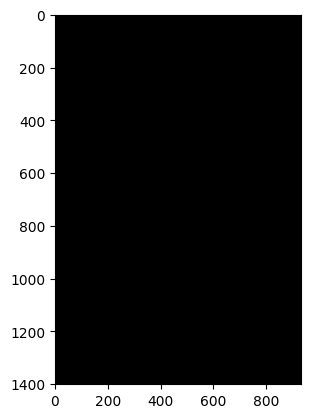

In [602]:
plt.imshow(black_background)

In [603]:
x_offset = 200
y_offset = 450

x_end = x_offset + fg.shape[0]
y_end = y_offset + fg.shape[1] 

black_background[y_offset:y_end, x_offset:x_end] = fg

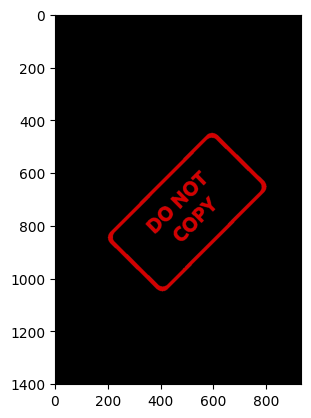

In [604]:
plt.imshow(black_background)

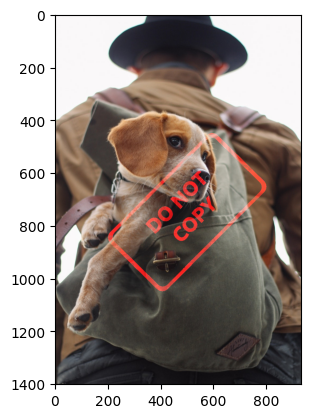

In [605]:
final_roi = cv.bitwise_or(imagen_uno,black_background)
plt.imshow(final_roi)